In [ ]:
!wget https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/crowd.tar

--2023-12-24 16:35:28--  https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/crowd.tar
Resolving n-ws-q0bez.s3pd12.sbercloud.ru (n-ws-q0bez.s3pd12.sbercloud.ru)... 37.230.193.192
Connecting to n-ws-q0bez.s3pd12.sbercloud.ru (n-ws-q0bez.s3pd12.sbercloud.ru)|37.230.193.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30476994560 (28G) [application/x-tar]
Saving to: ‘crowd.tar’

crowd.tar           100%[===================>]  28.38G  19.0MB/s    in 24m 35s 

2023-12-24 17:00:05 (19.7 MB/s) - ‘crowd.tar’ saved [30476994560/30476994560]



In [ ]:
!pip install noisereduce

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys

import librosa
import librosa.display

from sklearn.preprocessing import OneHotEncoder

from IPython.display import Audio
import noisereduce as nr

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import noisereduce as nr
from IPython.display import Audio
import numpy as np
import tarfile
import os


In [ ]:
import tarfile

tar_file_path = 'crowd.tar'

with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall()

print(f'Файл {tar_file_path} успешно разархивирован')

Файл crowd.tar успешно разархивирован


In [ ]:
def load_data(path, columns_to_drop=['hash_id', 'source_id']):
    try:
        df = pd.read_json(path, lines=True).drop(columns=columns_to_drop)
        df['audio_path'] = df['audio_path'].apply(lambda x: x[5:])
        df = df[df['speaker_emo'] != 'other']
        return df
    except ValueError as e:
        print(f"Error loading data from {path}: {e}")
        return None


In [ ]:
import json

with open('crowd_train/raw_crowd_train.jsonl', 'r') as file:
    first_line = file.readline()
    first_json = json.loads(first_line)

print("Keys in the first line:", first_json.keys())


Keys in the first line: dict_keys(['hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id'])


In [ ]:
crowd_train = load_data('crowd_train/raw_crowd_train.jsonl')
crowd_test = load_data('crowd_test/raw_crowd_test.jsonl')

In [ ]:
crowd_train.head()

,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo
0,475e76f77ac1ed7cabafca740b15b32a.wav,2.453000,angry,NaN,858305a5450b7bd1288ba0053b1cd1c1,не надо не надо не надо не надо,angry
1,2f9438ef68395c70a8714dc373a49d11.wav,4.640000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,фозил кори mp три,neutral
2,9937036a9c0dba20eecbffddd00f2be2.wav,4.341750,neutral,2.0,858305a5450b7bd1288ba0053b1cd1c1,None,None
3,fb0ae78586a235018103acec22a80a8f.wav,3.900562,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,сколько стоит на керамбит,neutral
4,196dcf9e1aaac46c2aee45e7f6adfb92.wav,4.780000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,афина когда закончится эта телепередача,neutral


In [ ]:
crowd_test.head()

,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo
0,9e9961c53ca6eeb440b217e539fbf46c.wav,5.82,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,я слушаю,neutral
1,0166f65a30354db8282682b1a280e64c.wav,3.70,sad,NaN,858305a5450b7bd1288ba0053b1cd1c1,каким стал сбер,neutral
2,d49a6b560155831725a7bdc7d0a96099.wav,4.38,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,где родился шерлок холмс,neutral
3,c6852b0925797612d7b6724da8cbe7b4.wav,8.58,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,открой в браузере ennio morricone,neutral
4,0166f65a30354db8282682b1a280e64c.wav,3.70,sad,NaN,a5562e26cd8f1949488a2d1e1e549d97,каким стал сбер,neutral


<ipython-input-10-caaa877354d1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crowd_train['duration'], label='crowd_train', hist=False)
<ipython-input-10-caaa877354d1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crowd_test['duration'], label='crowd_test', hist=False)


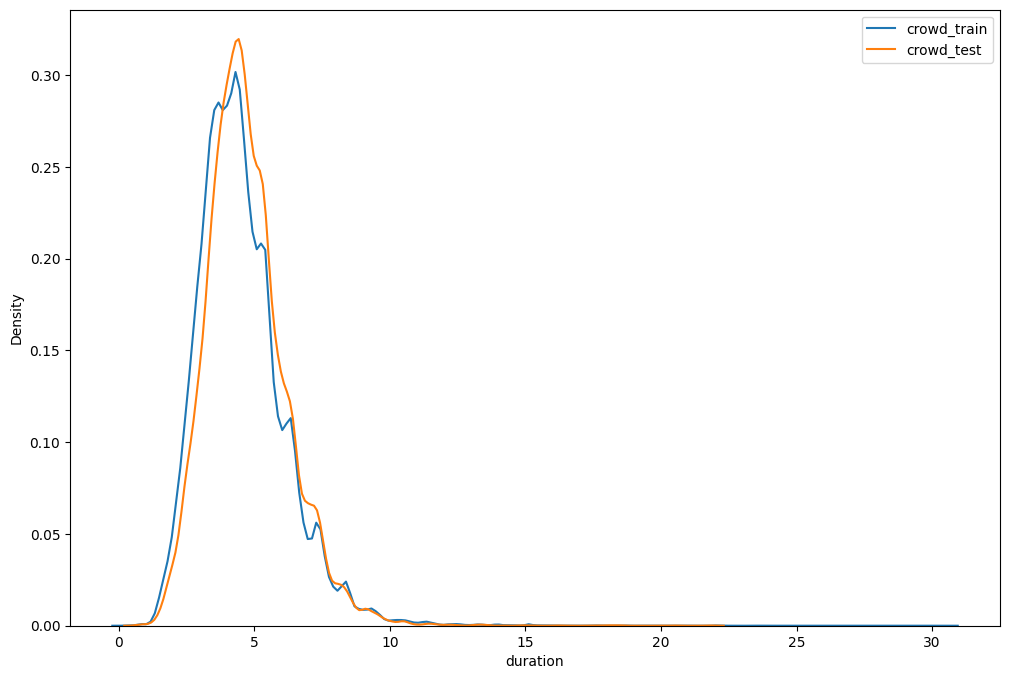

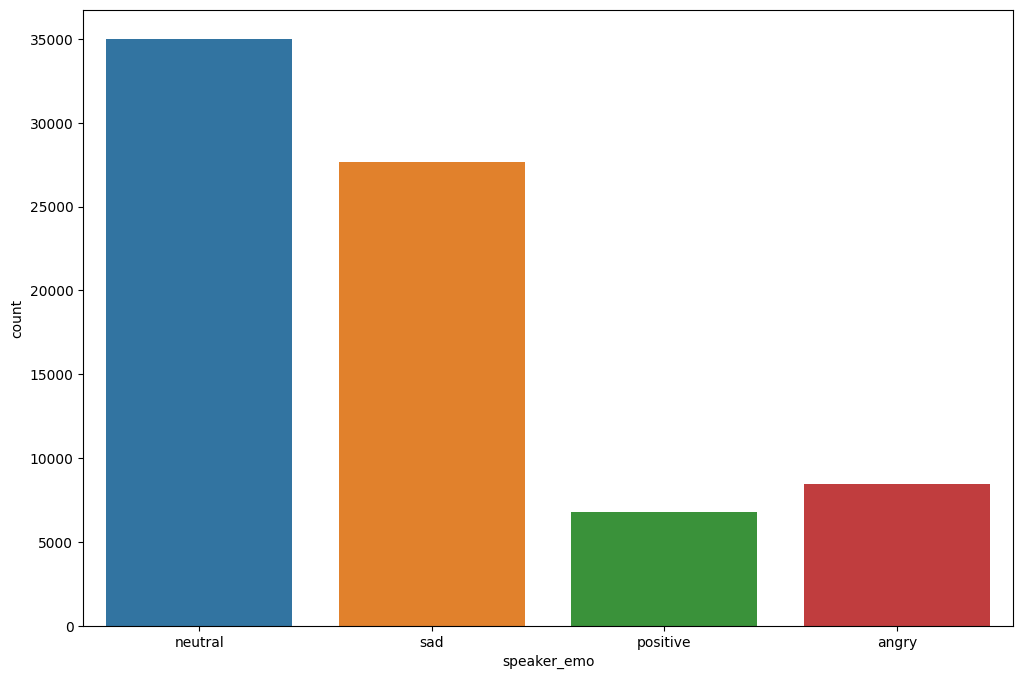

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(crowd_train['duration'], label='crowd_train', hist=False)
sns.distplot(crowd_test['duration'], label='crowd_test', hist=False)

plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=crowd_test, x='speaker_emo', order=['neutral', 'sad', 'positive', 'angry'])
plt.show()


In [ ]:
neutral_count = len(crowd_train[crowd_train['speaker_emo'] == 'neutral'])
neutral_count

340649

In [ ]:
sad_count = len(crowd_train[crowd_train['speaker_emo'] == 'sad'])
sad_count



1000

In [ ]:
angry_count = len(crowd_train[crowd_train['speaker_emo'] == 'angry'])
angry_count

1000

In [ ]:
positive_count = len(crowd_train[crowd_train['speaker_emo'] == 'positive'])
positive_count

3500

In [ ]:
desired_count_per_emo = 3500

new_crowd_train = pd.DataFrame()

for emo in crowd_train['speaker_emo'].unique():
    emo_subset = crowd_train[crowd_train['speaker_emo'] == emo][:desired_count_per_emo]
    new_crowd_train = pd.concat([new_crowd_train, emo_subset])

crowd_train = new_crowd_train


In [ ]:
neutral_count = len(crowd_train[crowd_train['speaker_emo'] == 'neutral'])
neutral_count

3500

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    plt.plot(np.arange(len(data)) / sr, data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar()

def create_mfcc(data, sr, e):
    plt.figure(figsize=(11, 3))
    mfcc = librosa.feature.mfcc(y=data, sr=sr, hop_length = 512, n_mfcc=13)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()
    plt.show()
    plt.plot(np.mean(mfcc.T, axis=0))
    plt.show()
    return mfcc

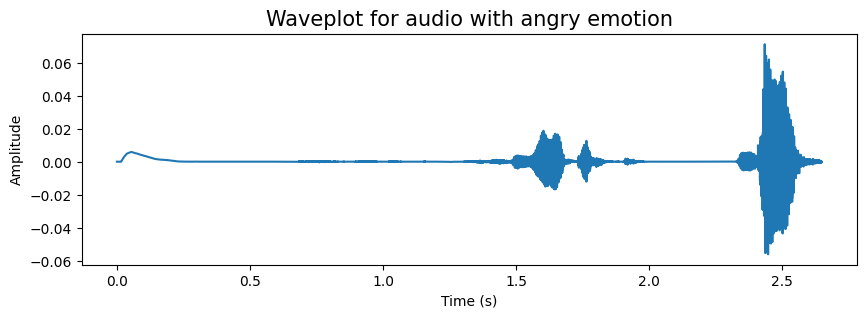

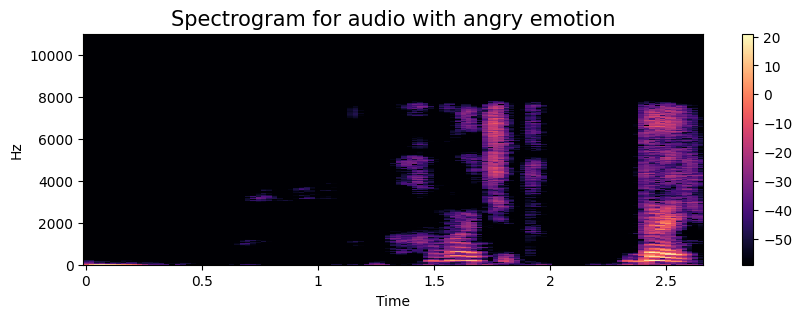

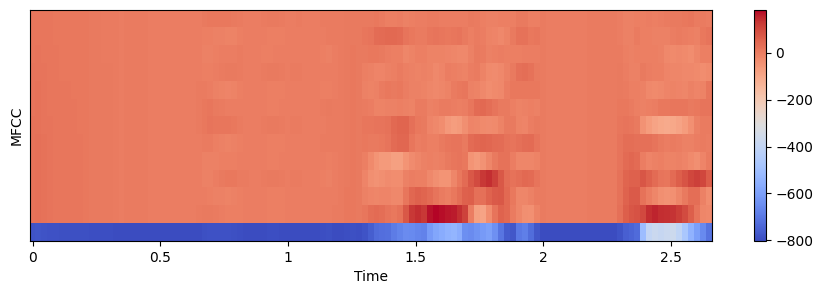

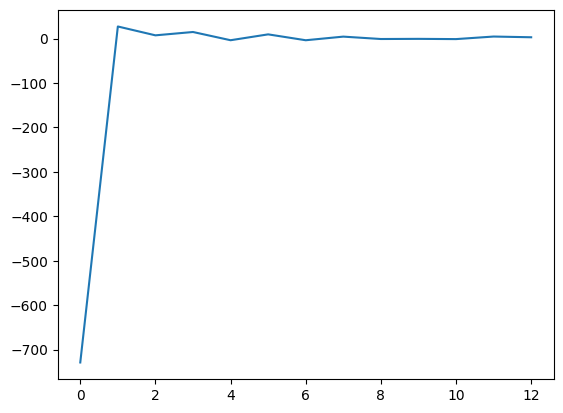

In [ ]:
emo = 'angry'
path = 'crowd_train/wavs/' + crowd_train[crowd_train['speaker_emo'] == emo]['audio_path'].iloc[3]
data, sr = librosa.load(path)
data = nr.reduce_noise(data, sr=sr)
xt, index = librosa.effects.trim(data, top_db=33)
display(Audio(xt, rate=sr))
create_waveplot(xt, sr, emo)
create_spectrogram(xt, sr, emo)
mfcc_p = create_mfcc(xt, sr, emo)
#Audio(path)

In [ ]:
desired_audio_path =  crowd_train[crowd_train['speaker_emo'] == emo]['audio_path'].iloc[3]

if crowd_train[crowd_train['audio_path'] == desired_audio_path].empty:
    print(f"No entry found for audio_path '{desired_audio_path}' in crowd_train.")
else:
    speaker_emo_value = crowd_train.loc[crowd_train['audio_path'] == desired_audio_path, 'speaker_emo'].values[0]
    print(f"For audio_path '{desired_audio_path}', speaker_emo is '{speaker_emo_value}'")


For audio_path '1b8c3332e12063486015a563cf7355fe.wav', speaker_emo is 'angry'


Text(0.5, 1.0, 'Mean MFCC на Crowd, после предобработки')

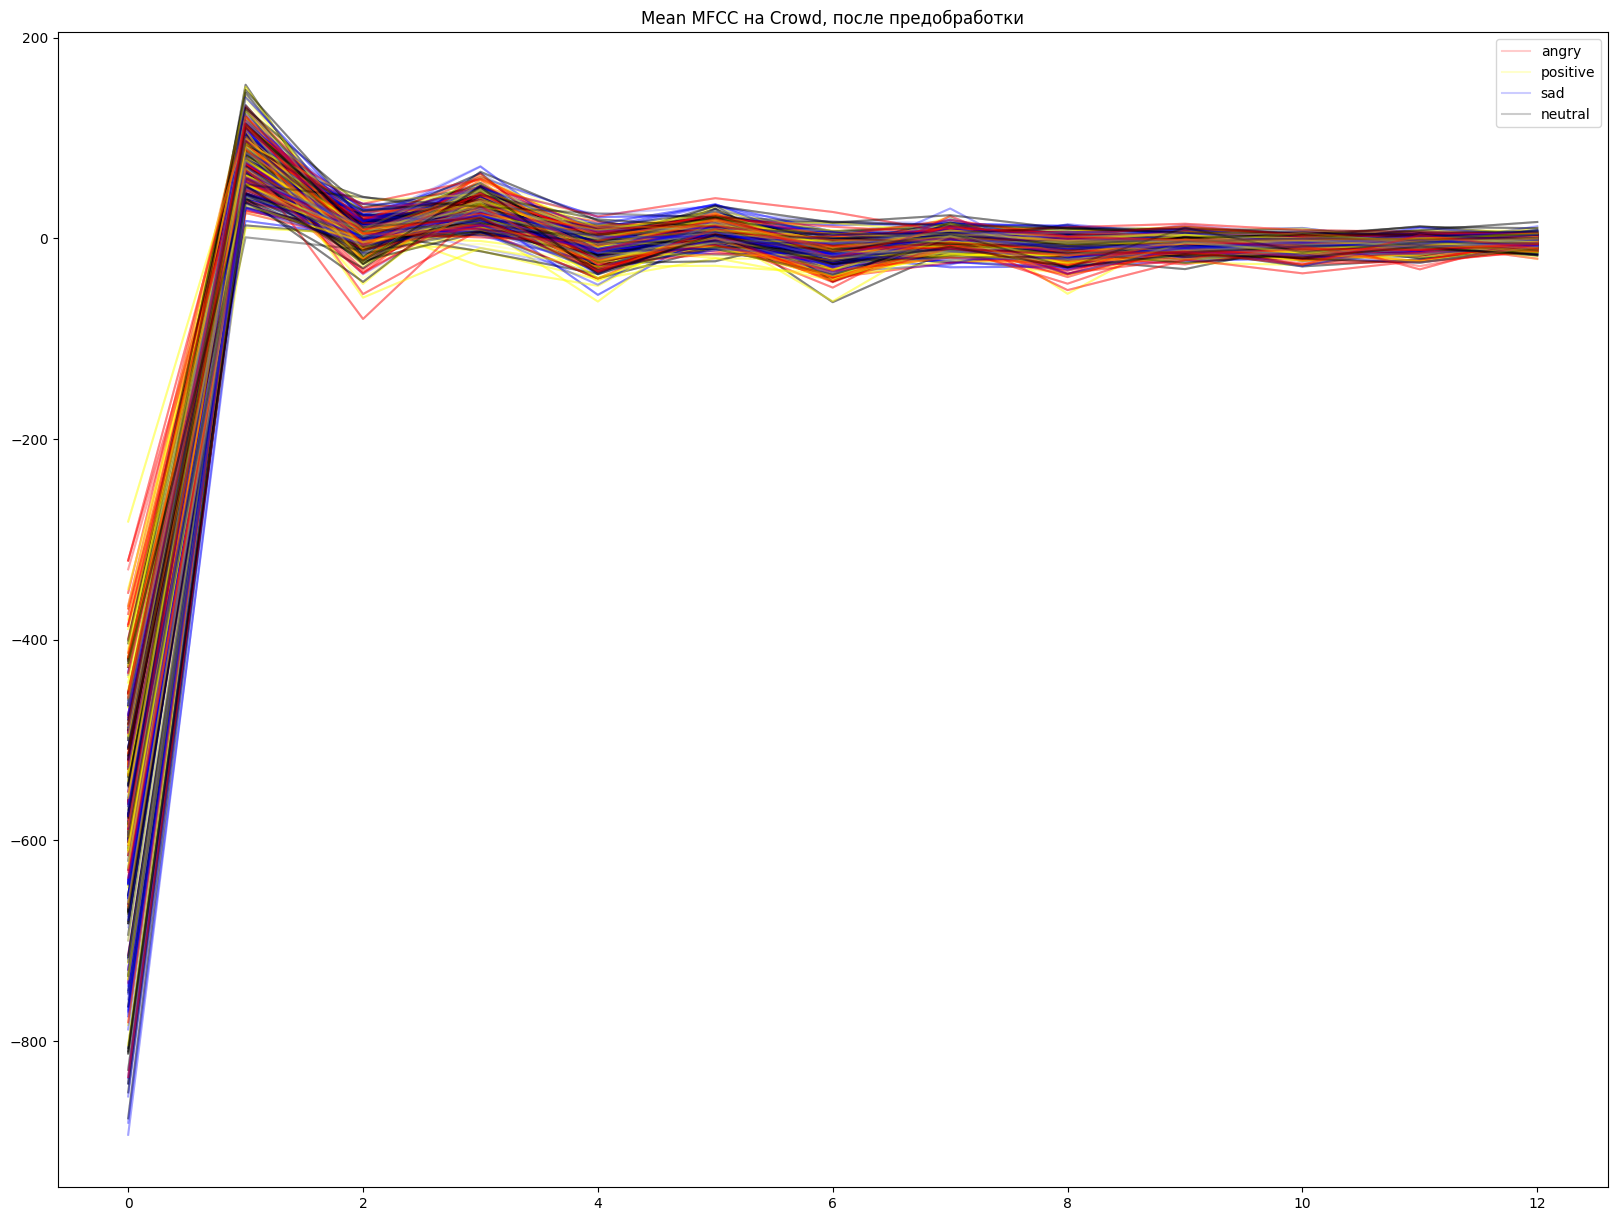

In [ ]:
plt.figure(figsize=(20, 15))
colors = ['', 'black', 'yellow', 'blue', '', 'red']
for i in range(200):
    for emo in ['angry', 'positive', 'sad', 'neutral']:
        path = 'crowd_train/wavs/' + crowd_train[crowd_train['speaker_emo'] == emo]['audio_path'].iloc[i]
        data, sr = librosa.load(path)
        data = nr.reduce_noise(data, sr=sr)
        data, index = librosa.effects.trim(data, top_db=33)
        mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, hop_length = 512, n_mfcc=13), axis=1)
        if i==0:
            plt.plot(mfcc, color=colors[len(emo)%6], alpha=0.2, label=emo)
        else:
            plt.plot(mfcc, color=colors[len(emo)%6], alpha=0.2)
plt.legend()
plt.title('Mean MFCC на Crowd, после предобработки')

**Решить задачу классификации классическими методами машинного обучения.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
def create_mfcc(data, sr):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, hop_length=512, n_mfcc=13)
    return np.mean(mfcc.T, axis=0)
crowd_train.fillna(value=0, inplace=True)
X = []
y = []

for index, row in crowd_train.iloc[::].iterrows():
    path = f"crowd_train/wavs/{row['audio_path']}"
    data, sr = librosa.load(path)
    data = nr.reduce_noise(data, sr=sr)
    data, _ = librosa.effects.trim(data, top_db=33)
    mfcc = create_mfcc(data, sr)
    X.append(mfcc)
    y.append(row['speaker_emo'])

X = np.array(X)
y = np.array(y)



/usr/local/lib/python3.10/dist-packages/noisereduce/spectralgate/nonstationary.py:71: RuntimeWarning: invalid value encountered in divide
  sig_mult_above_thresh = (abs_sig_stft - sig_stft_smooth) / sig_stft_smooth
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', C=1, class_weight='balanced')

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], class_weight='balanced')
best_svm_model.fit(X_train, y_train)

y_pred = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)


Best Parameters: {'C': 100, 'gamma': 0.001}
Accuracy: 0.885
Classification Report:
               precision    recall  f1-score   support

       angry       0.89      0.88      0.88       708
     neutral       0.88      0.87      0.88       707
    positive       0.87      0.90      0.88       678
         sad       0.90      0.89      0.90       707

    accuracy                           0.89      2800
   macro avg       0.88      0.89      0.88      2800
weighted avg       0.89      0.89      0.88      2800



**Решить задачу классификации, использовав различные архитектуры нейронных сетей, включая HuBERT.**

In [ ]:
!pip install torchaudio
!pip install torch
!pip install librosa


In [ ]:
import librosa
import noisereduce as nr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
X = []
y = []

for index, row in crowd_train.iterrows():
    path = f"crowd_train/wavs/{row['audio_path']}"
    data, sr = librosa.load(path)
    data = nr.reduce_noise(data, sr=sr)
    data, _ = librosa.effects.trim(data, top_db=33)
    mfcc = create_mfcc(data, sr)
    X.append(mfcc)
    y.append(row['speaker_emo'])

X = np.array(X)
y = np.array(y)

print("Shape of X:", X.shape)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/noisereduce/spectralgate/nonstationary.py:71: RuntimeWarning: invalid value encountered in divide
  sig_mult_above_thresh = (abs_sig_stft - sig_stft_smooth) / sig_stft_smooth
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


Shape of X: (14000, 13)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)

(11200, 13, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense, Flatten, Reshape

model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(256, kernel_size=3, activation='relu'),

    Conv1D(128, kernel_size=3, activation='relu'),
    Dropout(0.3),
    Conv1D(64, kernel_size=3, activation='relu'),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(len(label_encoder.classes_), activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')


Epoch 1/50
175/175 [==============================] - 10s 38ms/step - loss: 1.3630 - accuracy: 0.3137 - val_loss: 1.3615 - val_accuracy: 0.3054
Epoch 2/50
175/175 [==============================] - 6s 34ms/step - loss: 1.3475 - accuracy: 0.3335 - val_loss: 1.3351 - val_accuracy: 0.3475
Epoch 3/50
175/175 [==============================] - 6s 33ms/step - loss: 1.3405 - accuracy: 0.3444 - val_loss: 1.3309 - val_accuracy: 0.3479
Epoch 4/50
175/175 [==============================] - 6s 33ms/step - loss: 1.3336 - accuracy: 0.3491 - val_loss: 1.3212 - val_accuracy: 0.3604
Epoch 5/50
175/175 [==============================] - 6s 35ms/step - loss: 1.3299 - accuracy: 0.3555 - val_loss: 1.3182 - val_accuracy: 0.3607
Epoch 6/50
175/175 [==============================] - 6s 33ms/step - loss: 1.3255 - accuracy: 0.3615 - val_loss: 1.3184 - val_accuracy: 0.3643
Epoch 7/50
175/175 [==============================] - 6s 34ms/step - loss: 1.3217 - accuracy: 0.3648 - val_loss: 1.3117 - val_accuracy: 0.367

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')


Epoch 1/50
175/175 [==============================] - 6s 36ms/step - loss: 1.0591 - accuracy: 0.5411 - val_loss: 1.1427 - val_accuracy: 0.5050
Epoch 2/50
175/175 [==============================] - 6s 32ms/step - loss: 1.0445 - accuracy: 0.5506 - val_loss: 1.1648 - val_accuracy: 0.5025
Epoch 3/50
175/175 [==============================] - 6s 36ms/step - loss: 1.0458 - accuracy: 0.5554 - val_loss: 1.1180 - val_accuracy: 0.5225
Epoch 4/50
175/175 [==============================] - 6s 32ms/step - loss: 1.0296 - accuracy: 0.5682 - val_loss: 1.1480 - val_accuracy: 0.5179
Epoch 5/50
175/175 [==============================] - 6s 35ms/step - loss: 1.0290 - accuracy: 0.5599 - val_loss: 1.1207 - val_accuracy: 0.5232
Epoch 6/50
175/175 [==============================] - 6s 32ms/step - loss: 1.0167 - accuracy: 0.5659 - val_loss: 1.1210 - val_accuracy: 0.5268
Epoch 7/50
175/175 [==============================] - 6s 37ms/step - loss: 1.0073 - accuracy: 0.5749 - val_loss: 1.1115 - val_accuracy: 0.5250

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')


Epoch 1/50
175/175 [==============================] - 6s 36ms/step - loss: 0.6985 - accuracy: 0.7230 - val_loss: 0.8825 - val_accuracy: 0.6636
Epoch 2/50
175/175 [==============================] - 6s 32ms/step - loss: 0.6998 - accuracy: 0.7237 - val_loss: 0.9156 - val_accuracy: 0.6614
Epoch 3/50
175/175 [==============================] - 6s 35ms/step - loss: 0.6893 - accuracy: 0.7265 - val_loss: 0.8533 - val_accuracy: 0.6821
Epoch 4/50
175/175 [==============================] - 6s 33ms/step - loss: 0.6738 - accuracy: 0.7296 - val_loss: 0.8447 - val_accuracy: 0.6843
Epoch 5/50
175/175 [==============================] - 6s 36ms/step - loss: 0.6882 - accuracy: 0.7274 - val_loss: 0.8654 - val_accuracy: 0.6707
Epoch 6/50
175/175 [==============================] - 6s 31ms/step - loss: 0.6638 - accuracy: 0.7357 - val_loss: 0.8467 - val_accuracy: 0.6996
Epoch 7/50
175/175 [==============================] - 6s 37ms/step - loss: 0.6551 - accuracy: 0.7445 - val_loss: 0.8319 - val_accuracy: 0.6925

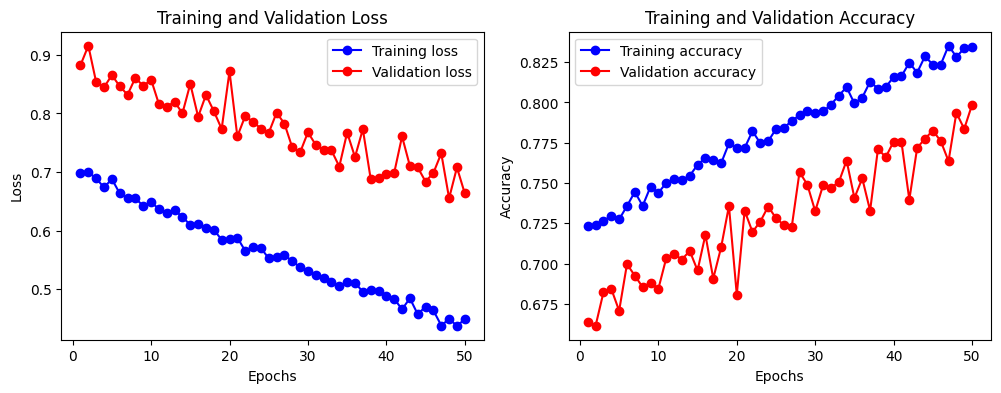

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

88/88 [==============================] - 1s 14ms/step


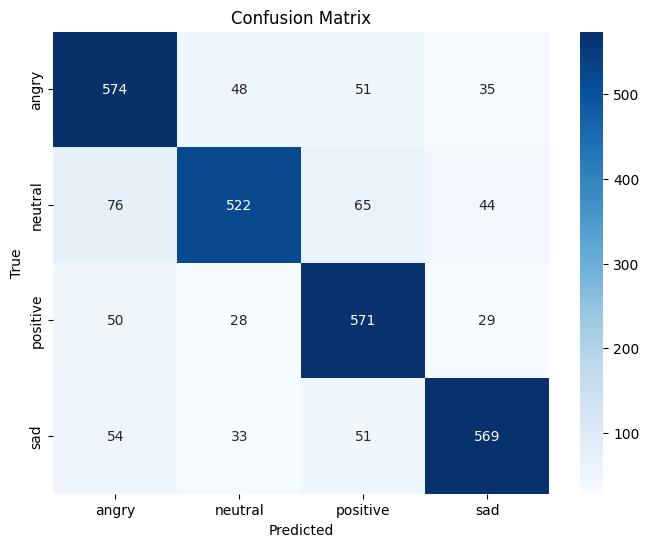

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense

use_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_model = hub.load(use_url)

model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(256, kernel_size=3, activation='relu'),
    Conv1D(128, kernel_size=3, activation='relu'),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(len(label_encoder.classes_), activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 11, 128)           512       
                                                                 
 conv1d_4 (Conv1D)           (None, 9, 256)            98560     
                                                                 
 conv1d_5 (Conv1D)           (None, 7, 128)            98432     
                                                                 
 lstm_2 (LSTM)               (None, 7, 128)            131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 461188 (1.76 MB)
Trainable params: 461188 

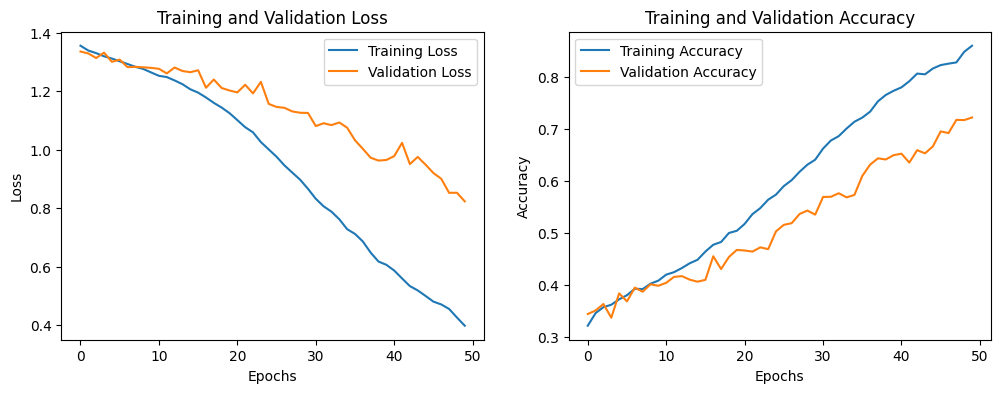

88/88 [==============================] - 1s 8ms/step


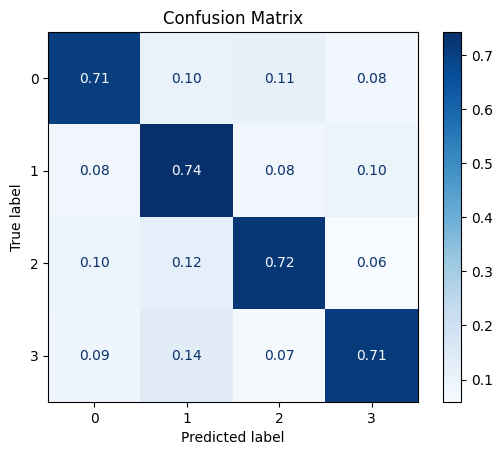

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes, normalize='true')

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format=".2f")
plt.title('Confusion Matrix')
plt.show()


**4 и 5 задание**

In [ ]:
pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 8.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.7 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801356 sha256=44e0abc101137a8877fb2f952c13b36aef2c5ccee91b0df52f5bc23aa30d3e9a
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


In [ ]:
pip install setuptools-rust

In [ ]:
!pip install flask flask-ngrok pyaudio sounddevice

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 788.8 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects


In [ ]:
!pip install sounddevice

  Using cached sounddevice-0.4.6-py3-none-any.whl (31 kB)


In [ ]:
!pip install pydub

In [ ]:
!pip install pyngrok

In [ ]:
!apt-get install -y libportaudio2


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 0s (290 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Setting up libportaudio2:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/lib

In [ ]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.3 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801356 sha256=fc551f0e08867f0cfca4c70167709565b35952684a2ae1635bbe642ab6b6d68a
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


In [ ]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("../../a01.wav")
print(result["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Shall you dark suit in greasy wash water all year?


In [ ]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("../../1.wav")
print(result["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Юрий Дутик, Константин Хабинский.


In [ ]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("../../2.wav")
print(result["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Как выглядит обсетен?


In [ ]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("../../3.wav")
print(result["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Джой, скажи таня какашка.


In [ ]:
pip install transformers

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import whisper

model = whisper.load_model("base")
result = model.transcribe("../../a01.wav")
text = result["text"]
model_path = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = BertTokenizer.from_pretrained(model_path)

ruBERT_model = BertForSequenceClassification.from_pretrained(model_path)

inputs = tokenizer(text, return_tensors="pt", truncation=True)
outputs = ruBERT_model(**inputs)
logits = outputs.logits
predictions = torch.argmax(logits, dim=1).item()

print("Sentiment Prediction:", predictions)



/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Sentiment Prediction: 4


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import whisper

model = whisper.load_model("base")
result = model.transcribe("../../a01.wav")
text = result["text"]

model_path = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = BertTokenizer.from_pretrained(model_path)

ruBERT_model = BertForSequenceClassification.from_pretrained(model_path)

text = "Очень очень плохо, кошмар, ненавижу"
inputs = tokenizer(text, return_tensors="pt", truncation=True)
outputs = ruBERT_model(**inputs)
logits = outputs.logits
predictions = torch.argmax(logits, dim=1).item()

sentiment_labels = ["Очень негативная", "Негативная", "Нейтральная", "Позитивная", "Очень позитивная"]
sentiment_text = sentiment_labels[predictions]

print("Sentiment Prediction:", sentiment_text)


Sentiment Prediction: Очень негативная


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import whisper

model = whisper.load_model("base")
result = model.transcribe("../../1.wav")
text = result["text"]

model_path = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = BertTokenizer.from_pretrained(model_path)

ruBERT_model = BertForSequenceClassification.from_pretrained(model_path)

inputs = tokenizer(text, return_tensors="pt", truncation=True)
outputs = ruBERT_model(**inputs)
logits = outputs.logits
predictions = torch.argmax(logits, dim=1).item()

sentiment_labels = ["Очень негативная", "Негативная", "Нейтральная", "Позитивная", "Очень позитивная"]
sentiment_text = sentiment_labels[predictions]

print("Sentiment Prediction:", sentiment_text)

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Sentiment Prediction: Позитивная


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import whisper

def transcribe_audio(file_path, model):
    result = model.transcribe(file_path)
    return result["text"]

def predict_sentiment(text, model, tokenizer, sentiment_labels):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1).item()
    return sentiment_labels[predictions]

whisper_model = whisper.load_model("base")

model_path = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_path)
ruBERT_model = BertForSequenceClassification.from_pretrained(model_path)

sentiment_labels = ["Очень негативная", "Негативная", "Нейтральная", "Позитивная", "Очень позитивная"]

audio_files = ["../../1.wav", "../../2.wav", "../../3.wav", "../../a01.wav"]

for file_path in audio_files:
    transcribed_text = transcribe_audio(file_path, whisper_model)
    sentiment_prediction = predict_sentiment(transcribed_text, ruBERT_model, tokenizer, sentiment_labels)

    print(f"Audio File: {file_path}")
    print(f"Transcribed Text: {transcribed_text}")
    print(f"Sentiment Prediction: {sentiment_prediction}\n")


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Audio File: ../../1.wav
Transcribed Text:  Юрий Дутик, Константин Хабинский.
Sentiment Prediction: Позитивная



/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Audio File: ../../2.wav
Transcribed Text:  Как выглядит обсетен?
Sentiment Prediction: Очень негативная



/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Audio File: ../../3.wav
Transcribed Text:  Джой, скажи таня какашка.
Sentiment Prediction: Очень негативная



/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Audio File: ../../a01.wav
Transcribed Text:  Shall you dark suit in greasy wash water all year?
Sentiment Prediction: Очень позитивная



In [ ]:
from flask import Flask, render_template, request, jsonify
import os
import whisper
from transformers import BertTokenizer, BertForSequenceClassification
import torch

app = Flask(__name__)

whisper_model = whisper.load_model("base")

model_path = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_path)
ruBERT_model = BertForSequenceClassification.from_pretrained(model_path)
sentiment_labels = ["Очень негативная", "Негативная", "Нейтральная", "Позитивная", "Очень позитивная"]

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/upload', methods=['POST'])
def upload():
    if 'file' not in request.files:
        return jsonify({'error': 'Файл не предоставлен'})

    file = request.files['file']
    if file.filename == '':
        return jsonify({'error': 'Файл не выбран'})

    if file:
        file_path = os.path.join('uploads', file.filename)
        file.save(file_path)

        result = whisper_model.transcribe(file_path)
        transcribed_text = result["text"]

        inputs = tokenizer(transcribed_text, return_tensors="pt", truncation=True)
        outputs = ruBERT_model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1).item()
        sentiment_prediction = sentiment_labels[predictions]

        return jsonify({'transcribed_text': transcribed_text, 'sentiment_prediction': sentiment_prediction})

if not os.path.exists('uploads'):
    os.makedirs('uploads')

app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
